In [1]:
import sys
#sys.path.append('..')
import os
import json
from time import time
import numpy as np
from tqdm import tqdm
import helper
from sklearn.decomposition import PCA
from PIL import Image


data stuff

In [2]:
from fuel.datasets.hdf5 import H5PYDataset
from fuel.schemes import ShuffledScheme, SequentialScheme
from fuel.streams import DataStream
import h5py

try:
    hf["target"].shape
except:
    hf = h5py.File('faces.hdf5','r+')
num_samples = hf["input"].shape[0]

print("number of samples in dataset : %i" %num_samples)

train_input = hf["input"][2000:num_samples]
train_target = hf['target'][2000:num_samples]
val_input = hf["input"][0:1000]
val_target = hf['target'][0:1000]
test_input = hf["input"][1000:2000]
test_target = hf['target'][1000:2000]

number of samples in dataset : 5120


In [3]:
train_enlarge_input = []

for i in range(len(train_input)):
    large_img = Image.fromarray(train_input[i].astype(np.uint8)).resize((128,160))
    if i == 3:
        print(large_img.size)
    train_enlarge_input.append(np.array(large_img))

(128, 160)


EXAMPLE INPUT IMAGE:


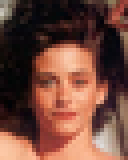

In [4]:
print("EXAMPLE INPUT IMAGE:")
Image.fromarray(train_enlarge_input[3].astype(np.uint8))


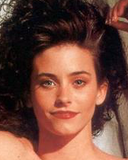

In [5]:
Image.fromarray(train_target[3].astype(np.uint8))

In [6]:
helper.cmp_images_psnr(train_target, train_enlarge_input, len(train_target))

23.797149776288443

Bilinear Interpolation

In [7]:
bilinear_train_input = helper.bulk_image_interpolate(train_input, Image.BILINEAR)
helper.cmp_images_psnr(train_target, bilinear_train_input, len(train_target))

25.475123632017205

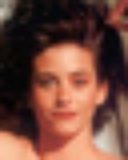

In [8]:
Image.fromarray(bilinear_train_input[3].astype(np.uint8))

Bicubic Interpolation

In [9]:
bicubic_train_input = helper.bulk_image_interpolate(train_input, Image.BICUBIC)
helper.cmp_images_psnr(train_target, bicubic_train_input, len(train_target))

26.19404327845503

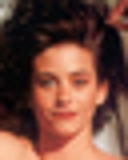

In [ ]:
Image.fromarray(bicubic_train_input[3].astype(np.uint8))

PCA then interpolate

In [ ]:
pca = PCA()

array = [input.flatten() for input in train_input]
#X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
train_input_pca = pca.fit_transform(array)
train_input_pca = [np.reshape(a, (126, 160,3)) for a in train_input_pca]
#len(array)

#[input.flatten() for input in train_input]

bilinear after pca

In [ ]:
bilinear_pca_train_input = helper.bulk_image_interpolate(train_input_pca, Image.BILINEAR)
helper.cmp_images_psnr(train_target, bilinear_pca_train_input, len(train_target))

In [ ]:
Image.fromarray(bilinear_pca_train_input[3].astype(np.uint8))

bicubic after pca

In [ ]:
bicubic_pca_train_input = helper.bulk_image_interpolate(train_input_pca, Image.BICUBIC)
helper.cmp_images_psnr(train_target, bicubic_pca_train_input, len(train_target))

In [ ]:
Image.fromarray(bicubic_pca_train_input[3].astype(np.uint8))